In [1]:
import os

data_path = "/home/omerc/IKT450/Proje/LungXRays-grayscale"

# How many files are in each folder?
for folder in ["train", "val", "test"]:
    folder_path = os.path.join(data_path, folder)
    if os.path.exists(folder_path):
        files = os.listdir(folder_path)
        print(f"📂 The '{folder}' folder contains {len(files)} files.")
        print("First 5 files:", files[:5])
    else:
        print(f"The '{folder}' folder was not found!")


📂 train klasöründe 4 dosya var.
İlk 5 dosya: ['Tuberculosis', 'Pneumonia', 'Normal', 'Corona Virus Disease']
📂 val klasöründe 4 dosya var.
İlk 5 dosya: ['Tuberculosis', 'Pneumonia', 'Normal', 'Corona Virus Disease']
📂 test klasöründe 4 dosya var.
İlk 5 dosya: ['Tuberculosis', 'Pneumonia', 'Normal', 'Corona Virus Disease']


In [2]:
data_path = "/home/omerc/IKT450/Proje/LungXRays-grayscale/train"

for category in os.listdir(data_path):
    category_path = os.path.join(data_path, category)
    if os.path.isdir(category_path):  
        files = os.listdir(category_path)
        print(f"📂 The '{category}' class contains {len(files)} images.")
        print("First 5 images:", files[:5])

📂 Tuberculosis sınıfında 1097 görüntü var.
İlk 5 görüntü: ['533.jpg', '197.jpg', '487.jpg', '291.jpg', '617.jpg']
📂 Pneumonia sınıfında 1097 görüntü var.
İlk 5 görüntü: ['533.jpg', '487.jpg', '291.jpg', '617.jpg', '377.jpg']
📂 Normal sınıfında 1087 görüntü var.
İlk 5 görüntü: ['533.jpg', '197.jpg', '487.jpg', '291.jpg', '377.jpg']
📂 Corona Virus Disease sınıfında 1097 görüntü var.
İlk 5 görüntü: ['197.jpg', '487.jpg', '291.jpg', '617.jpg', '377.jpg']


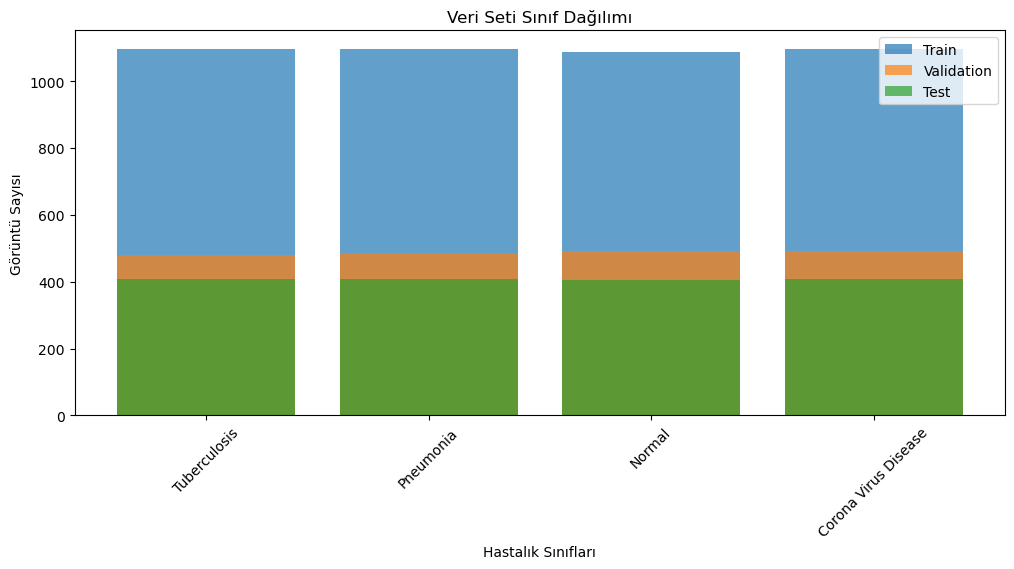

In [7]:
import os
import matplotlib.pyplot as plt

# Dataset paths
data_paths = {
    "Train": "/home/omerc/IKT450/Proje/LungXRays-grayscale/train",
    "Validation": "/home/omerc/IKT450/Proje/LungXRays-grayscale/val",
    "Test": "/home/omerc/IKT450/Proje/LungXRays-grayscale/test",
}

# Count images per class in each dataset split
class_counts = {}
for split, path in data_paths.items():
    if os.path.exists(path):
        class_counts[split] = {cls: len(os.listdir(os.path.join(path, cls))) 
                               for cls in os.listdir(path) if os.path.isdir(os.path.join(path, cls))}
    else:
        class_counts[split] = {}

# Plotting the distribution
plt.figure(figsize=(12, 5))
for split, counts in class_counts.items():
    plt.bar(counts.keys(), counts.values(), alpha=0.7, label=split)

plt.xlabel("Disease Classes")
plt.ylabel("Number of Images")
plt.title("Dataset Class Distribution")
plt.legend()
plt.xticks(rotation=45)
plt.show()


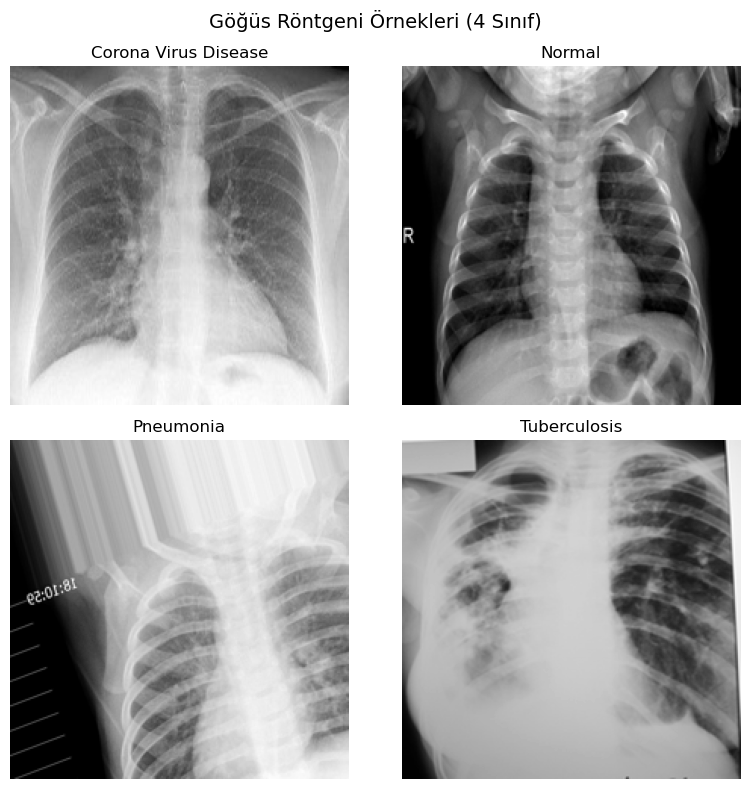

In [8]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define dataset directory
train_dir = "/home/omerc/IKT450/Proje/LungXRays-grayscale/train"

# Get the four class names from the dataset
class_names = sorted(os.listdir(train_dir))  # Sort class names
num_classes = len(class_names)

# Ensure that the dataset contains exactly 4 classes
if num_classes != 4:
    raise ValueError(f"Expected 4 classes, but found {num_classes}: {class_names}")

# Set up a 2x2 grid for displaying images
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Target size for uniform display
target_size = (224, 224)

# Select and display one image per class
for i, class_name in enumerate(class_names):
    class_path = os.path.join(train_dir, class_name)
    image_name = os.listdir(class_path)[0]  # Select the first image
    image_path = os.path.join(class_path, image_name)

    # Open, convert to grayscale, resize, and display the image
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    image = image.resize(target_size)  # Resize image for consistency
    
    # Plot the image
    ax = axes[i // 2, i % 2]
    ax.imshow(image, cmap="gray")
    ax.set_title(class_name, fontsize=12)
    ax.axis("off")

# Add a title and show the plot
plt.suptitle("Chest X-ray Examples (4 Classes)", fontsize=14)
plt.tight_layout()
plt.show()


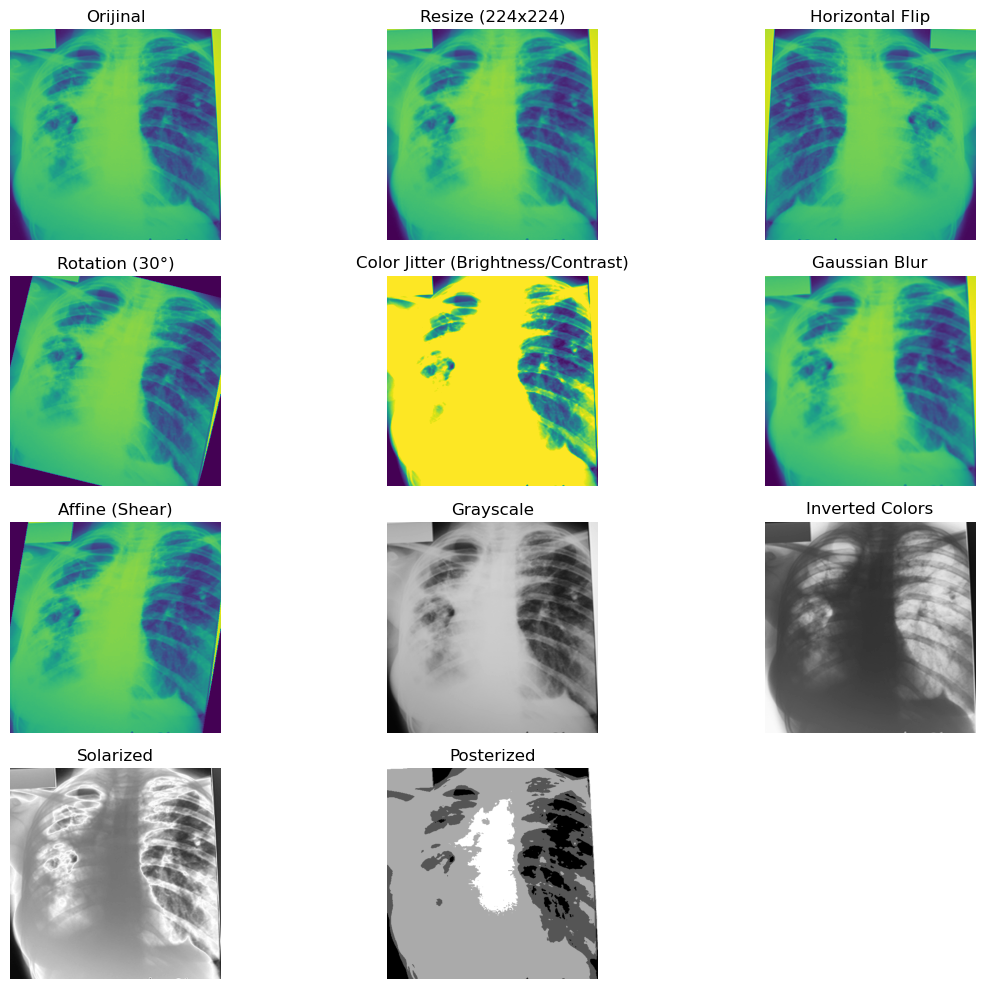

In [9]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms

train_dir = "/home/omerc/IKT450/Proje/LungXRays-grayscale/train"

first_class = os.listdir(train_dir)[0]
class_path = os.path.join(train_dir, first_class)

# İlk resmi seç
image_name = os.listdir(class_path)[0]
image_path = os.path.join(class_path, image_name)

image = Image.open(image_path)

transformations = {
    "Orijinal": transforms.Compose([]),
    "Resize (224x224)": transforms.Compose([transforms.Resize((224, 224))]),
    "Horizontal Flip": transforms.Compose([transforms.RandomHorizontalFlip(p=1)]),
    "Rotation (30°)": transforms.Compose([transforms.RandomRotation(30)]),
    "Color Jitter (Brightness/Contrast)": transforms.Compose([transforms.ColorJitter(brightness=0.8, contrast=0.8)]),
    "Gaussian Blur": transforms.Compose([transforms.GaussianBlur(kernel_size=5)]),
    "Affine (Shear)": transforms.Compose([transforms.RandomAffine(degrees=0, shear=20)]),
    "Grayscale": transforms.Compose([transforms.Grayscale(num_output_channels=1)]),
    "Inverted Colors": transforms.Compose([transforms.RandomInvert(p=1)]),
    "Solarized": transforms.Compose([transforms.RandomSolarize(threshold=128, p=1)]),
    "Posterized": transforms.Compose([transforms.RandomPosterize(bits=2, p=1)]),
}

plt.figure(figsize=(12, 10))

for i, (name, transform) in enumerate(transformations.items()):
    if transform.transforms: 
        transformed_image = transform(image)
    else:
        transformed_image = image

    plt.subplot(4, 3, i + 1)
    if name in ["Grayscale", "Inverted Colors", "Solarized", "Posterized"]:
        plt.imshow(transformed_image, cmap="gray")
    else:
        plt.imshow(transformed_image)
    plt.title(name)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import numpy as np
import os
import sys
import time

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# GPU Bilgisi Yazdırma
if torch.cuda.is_available():
    print(f"GPU Model: {torch.cuda.get_device_name(0)}")
    print(f"GPU Sayısı: {torch.cuda.device_count()}")

transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

Using device: cpu


In [12]:
DATASET_PATH = "/home/omerc/IKT450/Proje/LungXRays-grayscale"
train_dataset = datasets.ImageFolder(os.path.join(DATASET_PATH, "train"), transform=transform)
val_dataset = datasets.ImageFolder(os.path.join(DATASET_PATH, "val"), transform=transform)
test_dataset = datasets.ImageFolder(os.path.join(DATASET_PATH, "test"), transform=transform)

print(f'train: {len(train_dataset)}')
print(f'val: {len(val_dataset)}')
print(f'test: {len(test_dataset)}')

# DataLoader 
BATCH_SIZE = 64 
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True)


train: 4378
val: 1948
test: 1625


In [21]:
# Custom CNN
class CustomCNN(nn.Module):
    def __init__(self, num_classes=4):
        super(CustomCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 28 * 28, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )
    
    
    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

In [22]:
num_classes = len(train_dataset.classes)
model = CustomCNN(num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [23]:
class EarlyStopping:
    def __init__(self, patience=5, delta=0, path='best_model.pt'):
        self.patience = patience
        self.path = path
        self.delta = delta
        self.best_loss = float('inf')
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss, model):
        if val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            torch.save(model.state_dict(), self.path)
            self.counter = 0
        else:
            self.counter += 1
            print(f'Early stopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True

In [24]:
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    learning_loss, correct, total = 0.0, 0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        learning_loss += loss.item()
        _, predict = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predict == labels).sum().item()
    learning_loss_result = learning_loss / total if total > 0 else 0
    train_acc = 100 * correct / total if total > 0 else 0
    return learning_loss_result, train_acc

In [25]:
def validation(model, val_loader, criterion, device):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predict = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predict == labels).sum().item()
    result_running_loss = running_loss / total if total > 0 else 0
    result_val_acc = 100 * correct / total if total > 0 else 0
    return result_running_loss, result_val_acc



In [26]:
num_epoch = 10  earlyStopping = EarlyStopping(patience=5, path='checkpoint.pt')
start_time = time.time()
train_losses, train_accs, val_losses, val_accs = [], [], [], []

for epoch in range(num_epoch):
    train_loss, train_acc = train_model(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = validation(model, val_loader, criterion, device)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    print(f'Epoch {epoch+1}/{num_epoch}: Train Loss: {train_loss:.4f} Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')
    sys.stdout.flush()
    earlyStopping(val_loss, model)
    if earlyStopping.early_stop:
        print('Note: Early stopping triggered, stopping training.')
        break
end_time = time.time()
print(f'Training Time: {end_time - start_time:.2f} seconds')

Epoch 1/10: Train Loss: 0.0119 Train Acc: 69.9178, Val Loss: 0.0070, Val Acc: 83.8296
Epoch 2/10: Train Loss: 0.0059 Train Acc: 86.4550, Val Loss: 0.0054, Val Acc: 88.9117
Epoch 3/10: Train Loss: 0.0041 Train Acc: 90.1782, Val Loss: 0.0054, Val Acc: 87.3717
Early stopping counter: 1 out of 5
Epoch 4/10: Train Loss: 0.0031 Train Acc: 92.6450, Val Loss: 0.0042, Val Acc: 89.4764
Epoch 5/10: Train Loss: 0.0023 Train Acc: 94.6551, Val Loss: 0.0061, Val Acc: 87.2690
Early stopping counter: 1 out of 5
Epoch 6/10: Train Loss: 0.0018 Train Acc: 96.0027, Val Loss: 0.0045, Val Acc: 91.1191
Early stopping counter: 2 out of 5
Epoch 7/10: Train Loss: 0.0011 Train Acc: 97.5788, Val Loss: 0.0053, Val Acc: 88.9630
Early stopping counter: 3 out of 5
Epoch 8/10: Train Loss: 0.0008 Train Acc: 98.1498, Val Loss: 0.0054, Val Acc: 90.1437
Early stopping counter: 4 out of 5
Epoch 9/10: Train Loss: 0.0007 Train Acc: 98.6295, Val Loss: 0.0054, Val Acc: 91.5811
Early stopping counter: 5 out of 5
Note: Early stop

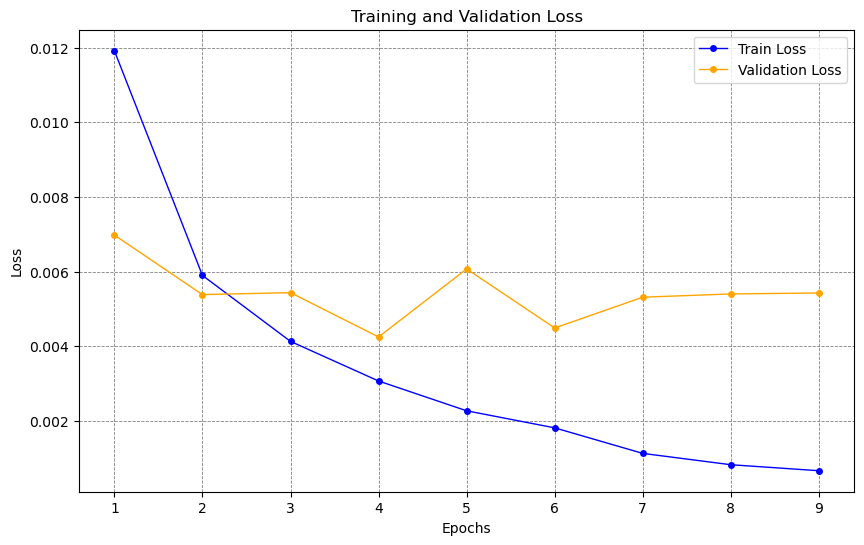

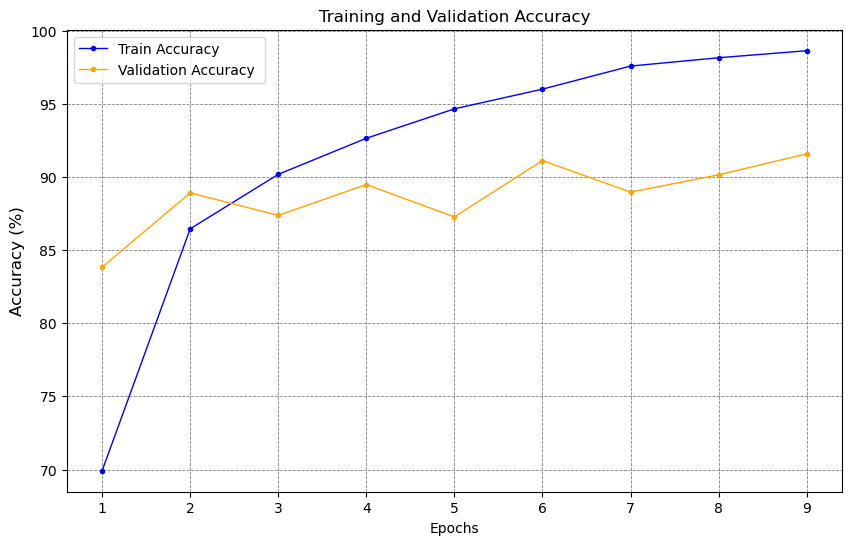

In [27]:
def Plot_metrics(train_losses, val_losses, train_accs, val_accs):
    epoch = range(1, len(train_losses)+1)
    plt.figure(figsize=(10, 6))
    plt.plot(epoch, train_losses, label= 'Train Loss', color = 'blue',  marker='o', markersize=4, linestyle='-', linewidth=1)
    plt.plot(epoch, val_losses, label='Validation Loss', color='orange',  marker='o', markersize=4, linestyle='-', linewidth=1)
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.grid(True, which='both', linestyle='--', linewidth=0.6, color='gray')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.plot(epoch, train_accs, label= 'Train Accuracy ', color = 'blue',  marker='o', markersize=3, linestyle='-', linewidth=1)
    plt.plot(epoch, val_accs, label='Validation Accuracy ', color='orange',  marker='o', markersize=3, linestyle='-', linewidth=1)
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)', fontsize=12)
    plt.title('Training and Validation Accuracy')
    plt.grid(True, which='both', linestyle='--', linewidth=0.6, color='gray')
    plt.show()

Plot_metrics(train_losses, val_losses, train_accs, val_accs)

In [28]:
def evaluate_model(model, test_loader, criterion, device):
    model.eval()
    test_loss, correct, total = 0.0, 0, 0
    all_preds, all_labels = [], []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predict = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predict == labels).sum().item()
            all_preds.extend(predict.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    avg_test_loss = test_loss / total if total > 0 else 0
    test_acc = 100 * correct / total if total > 0 else 0
    print(f'Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_acc:.4f}%')
    return avg_test_loss, test_acc

evaluate_model(model, test_loader, criterion, device)

Test Loss: 0.0050, Test Accuracy: 92.2462%


(0.004977708527961602, 92.24615384615385)

In [29]:
# Classification Report Yazdırma
from sklearn.metrics import  classification_report

def classification_report_test(model, data_loader, class_names):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = outputs.max(1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

classification_report_test(model, test_loader, train_dataset.classes)

Classification Report:
                      precision    recall  f1-score   support

Corona Virus Disease       0.92      0.92      0.92       407
              Normal       0.93      0.91      0.92       404
           Pneumonia       0.89      0.93      0.91       407
        Tuberculosis       0.95      0.93      0.94       407

            accuracy                           0.92      1625
           macro avg       0.92      0.92      0.92      1625
        weighted avg       0.92      0.92      0.92      1625



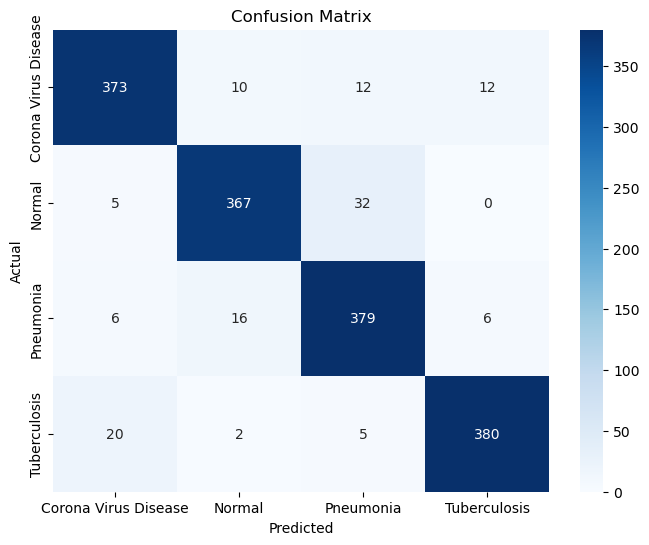

In [30]:
# Confusion Matrix Çizimi
def plot_confusion_matrix(model, data_loader, class_names):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = outputs.max(1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
plot_confusion_matrix(model, test_loader, train_dataset.classes)


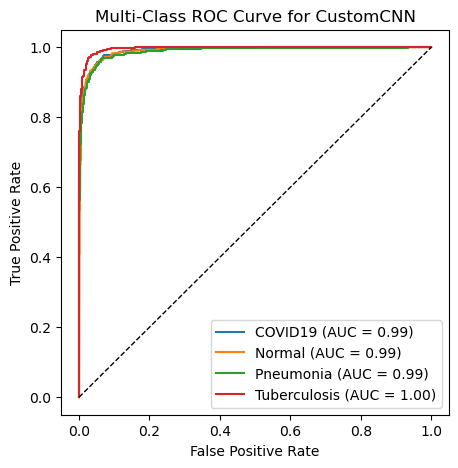

In [31]:
def plot_auc_curve(model, data_loader, class_labels):
    model.eval()
    all_probs = []
    all_labels = []
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probs = torch.nn.functional.softmax(outputs, dim=1)
            all_probs.extend(probs.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    all_probs = np.array(all_probs)
    all_labels = np.array(all_labels)
    
    plt.figure(figsize=(5, 5))
    for i, label in enumerate(class_labels):
        fpr, tpr, _ = roc_curve(all_labels == i, all_probs[:, i])
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_score:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1)  # Diagonal line for reference
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-Class ROC Curve for CustomCNN')
    plt.legend()
    plt.show()

# Örnek sınıf etiketleri
target_labels = ['COVID19', 'Normal', 'Pneumonia', 'Tuberculosis']
plot_auc_curve(model, test_loader, target_labels)